{'mi': 50, 'type': 'request', 'num_mi': '1', 'username': 'Kevin', 'server_id': 0, 'current_price': '0'}
{'mi': 50, 'type': 'response', 'accept': True, 'server_id': 0, 'current_owner': 'Kevin', 'current_price': 50}
{'mi': 50, 'type': 'request', 'num_mi': '2', 'username': 'Tyler', 'server_id': 0, 'current_price': '50'}
{'mi': 50, 'type': 'response', 'accept': True, 'server_id': 0, 'current_owner': 'Tyler', 'current_price': 150}
{'mi': 50, 'type': 'request', 'num_mi': '2', 'username': 'Kevin', 'server_id': 0, 'current_price': '150'}
{'mi': 50, 'type': 'response', 'accept': True, 'server_id': 0, 'current_owner': 'Kevin', 'current_price': 250}
{'mi': 50, 'type': 'request', 'num_mi': '2', 'username': 'Tyler', 'server_id': 0, 'current_price': '250'}
{'mi': 50, 'type': 'response', 'accept': True, 'server_id': 0, 'current_owner': 'Tyler', 'current_price': 350}
{'mi': 50, 'type': 'request', 'num_mi': '4', 'username': 'Daniel', 'server_id': 0, 'current_price': '350'}
{'mi': 50, 'type': 'response'

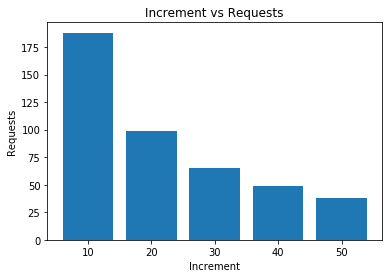

(35, 43, 59, 93, 177)
(2, 6, 6, 6, 11)


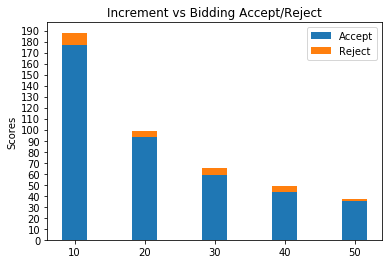

In [79]:
%matplotlib inline

import requests as req
import numpy as np
import json
import matplotlib.pyplot as plt
import collections



response = req.get('http://localhost:3001/getLogs').json()
type(json.loads(response[1]['logs'])['accept'])

m2req = collections.OrderedDict()
m2aj = collections.OrderedDict()
for line in response:
    js = json.loads(line['logs'])
    print(js)
    if js['type'] == 'request':
        if js['mi'] not in m2req:
            m2req[js['mi']] = 1
        else:
            m2req[js['mi']] += 1
    else:
        if js['accept']:
            if js['mi'] not in m2aj:
                m2aj[js['mi']] = [1, 0]
            else:
                m2aj[js['mi']][0] += 1
        else:
            if js['mi'] not in m2aj:
                m2aj[js['mi']] = [0, 1]
            else:
                m2aj[js['mi']][1] += 1
        

print(m2req)
print(m2aj)
N = 5
ind = np.arange(N)    # the x locations for the groups


# X: increment, Y: number of requests(update, bidding) received by servers
incs = list(m2req.keys())
reqs = list(m2req.values())
plt.bar(range(len(incs)), reqs[::-1])
plt.xticks(ind, incs[::-1])
plt.title('Increment vs Requests')
plt.xlabel('Increment')
plt.ylabel('Requests')
plt.savefig('incVSreq.png')
plt.show()

# X: increment, Y: total time of auction

# X: incremnt, Y: ration of accept/rejection
#plt.clf()
AJ = list(m2aj.values())
acc, rej = zip(*AJ)
print(acc)
print(rej)
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, acc[::-1], width)
p2 = plt.bar(ind, rej[::-1], width, bottom=acc[::-1])

plt.ylabel('Scores')
plt.title('Increment vs Bidding Accept/Reject')
plt.xticks(ind, ('10', '20', '30', '40', '50'))
plt.yticks(np.arange(0, 200, 10))
plt.legend((p1[0], p2[0]), ('Accept', 'Reject'))

plt.savefig('incVSaj.png')
plt.show()